In [2]:
import pandas as pd

df_medical = pd.read_csv("ECA.csv")

#removal of missing data (1)
df_medical.isnull().sum()
df_medical.dropna(axis = "rows", inplace = True)

#standardise gender entries (2)
df_medical["sex"] = df_medical["sex"].replace({"M":"male", "F":"female"})

#identifying and removal of outliers (medical costs) (3)
q1 = df_medical["charges"].quantile(q = 0.25)
q3 = df_medical["charges"].quantile(q = 0.75)
iqr = q3 - q1

llimit = q1 - (1.5*iqr)
ulimit = q3 + (1.5*iqr)

df_med_new = df_medical[~((df_medical["charges"] < llimit) | (df_medical["charges"] > ulimit))]

#review updated data
df_med_new


,PersonID,age,sex,bmi,children,smoker,region,charges
0,1,19.0,female,27.900,0,yes,southwest,16884.92400
1,2,18.0,male,33.770,1,no,southeast,1725.55230
2,3,28.0,male,33.000,3,no,southeast,4449.46200
3,4,33.0,male,22.705,0,no,northwest,21984.47061
4,5,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1335,1334,50.0,male,30.970,3,no,northwest,10600.54830
1336,1335,18.0,female,31.920,0,no,northeast,2205.98080
1337,1336,18.0,female,36.850,0,no,southeast,1629.83350
1338,1337,21.0,female,25.800,0,no,southwest,2007.94500


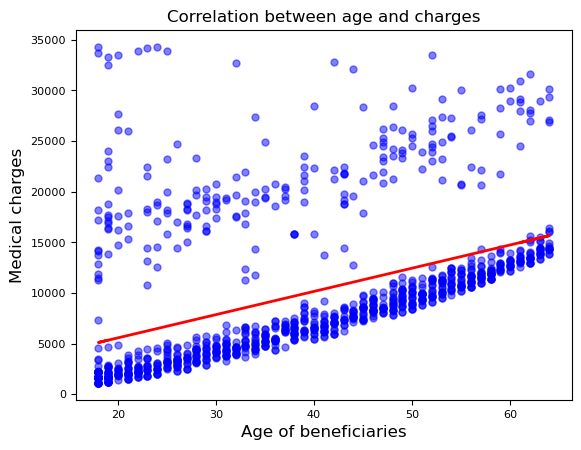

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#scatterplot between charges and age
plt.scatter(df_med_new["age"],df_med_new["charges"],
            color = "blue",
            marker = "o",
            s = 25,
            alpha = 0.5
           )

#graph labels/adjustments
plt.title("Correlation between age and charges", fontsize = 12)
plt.xlabel("Age of beneficiaries", fontsize = 12)
plt.ylabel("Medical charges", fontsize = 12)

#graph style
plt.style.use("fivethirtyeight")

#tick sizing
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#line of best fit
x = df_med_new[["age"]]
y = df_med_new["charges"]

bfline = LinearRegression()
bfline.fit(x,y)

y_predict = bfline.predict(x)

plt.plot(x, y_predict,
         color = "red",
         linewidth = 2) #draws the line of best fit

# Save as image
plt.savefig("scatterplot_age_charges", dpi=300, bbox_inches = "tight")  


#display graph
plt.show()

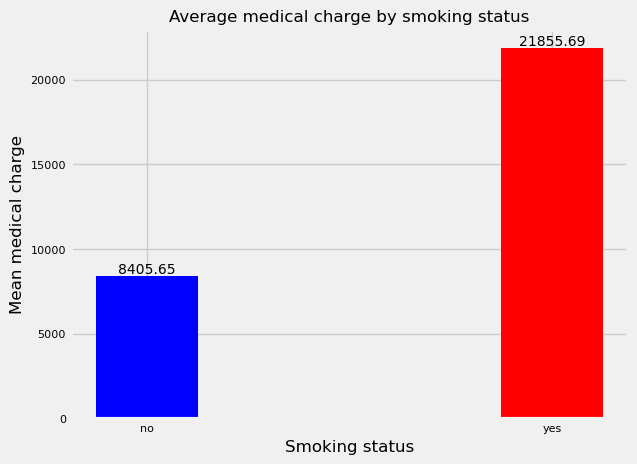

In [4]:
#bar graph

#grouping via smoking status + mean costs
smokerstatus = df_med_new.groupby(by = ["smoker"])["charges"].mean()

#axis defining
status = smokerstatus.index #x-axis yes/no
medcharge = smokerstatus.values #y-axis mean

#plotting bar graph
plt.bar(status,medcharge,
        color = ["blue","red"],
        width = 0.25
       )

#adjustments
plt.title("Average medical charge by smoking status" , fontsize = 12)
plt.xlabel("Smoking status", fontsize = 12)
plt.ylabel("Mean medical charge", fontsize = 12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#mean on each bar
for i in range(len(status)):
        plt.text(status[i], medcharge[i], f"{medcharge[i]:.2f}",ha="center", va="bottom",fontsize=10)

# Save as image
plt.savefig("bar_smoker", dpi=300, bbox_inches = "tight")  
        
        
plt.show()



C:\Users\muhd2\AppData\Local\Temp\ipykernel_13028\3385757140.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_med_new["bmi_category"] = pd.cut(df_med_new["bmi"], bins = bin_bmi , labels = bin_bmi_labels)
C:\Users\muhd2\AppData\Local\Temp\ipykernel_13028\3385757140.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_med_new["age_range"] = pd.cut(df_med_new["age"], bins = bin_age, labels = bin_age_labels)


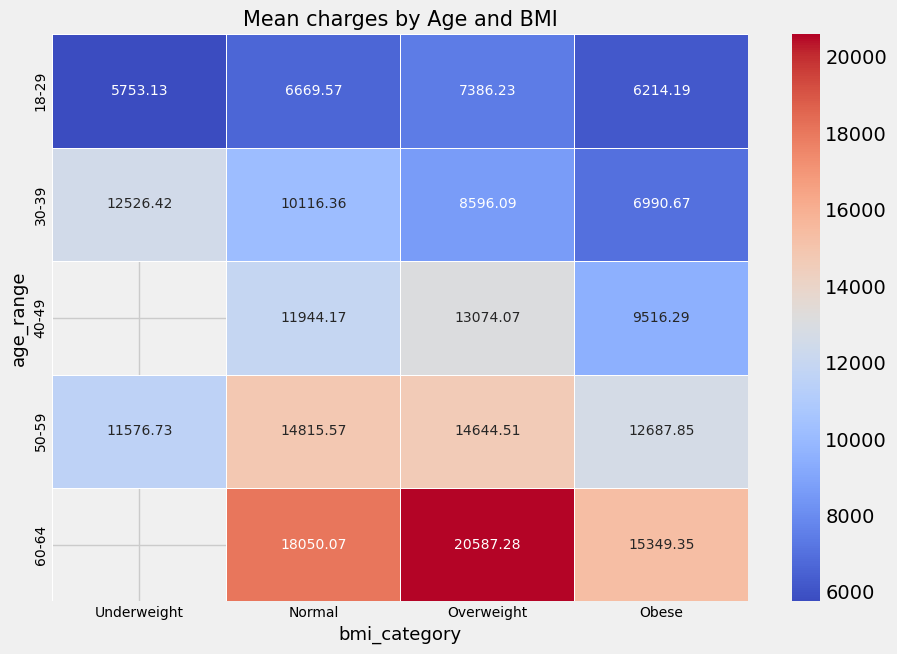

In [5]:
#heatmap
import seaborn as sns

#binning of BMI
bin_bmi = [0, 18.5, 24.9, 29.9, 100] #ranges between each category
bin_bmi_labels = ["Underweight","Normal", "Overweight", "Obese"]

#binning of age
bin_age = [17, 30, 40, 50, 60, 65]
bin_age_labels = ["18-29", "30-39", "40-49", "50-59", "60-64"]

#add coloumn for binned bmi
df_med_new["bmi_category"] = pd.cut(df_med_new["bmi"], bins = bin_bmi , labels = bin_bmi_labels)

#add coloumn for binned age
df_med_new["age_range"] = pd.cut(df_med_new["age"], bins = bin_age, labels = bin_age_labels)

#pivot table
heatmap_data = df_med_new.pivot_table(index='age_range',
                                      columns='bmi_category',
                                      values= 'charges',
                                      aggfunc='mean',
                                      )

#heatmap plot
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(heatmap_data,
                      cmap='coolwarm', 
                      annot=True, 
                      fmt='.2f', 
                      cbar=True,
                      linewidth = 0.5,
                      annot_kws={"size": 10,},
                      xticklabels = True,
                      yticklabels = True
                     )


#adjustments
plt.title("Mean charges by Age and BMI" , fontsize = 15)
plt.xlabel("bmi_category", fontsize= 13)
plt.ylabel("age_range", fontsize = 13)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Save as image
plt.savefig("heatmap_agebmicharges", dpi=300)  


plt.show()


In [10]:
#data exploration for decision tree

#imports
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree

#remove unecessary columns
df_med_new.drop(columns = ["bmi_category", "age_range"], inplace = True)

#dummies
df_dummy = pd.get_dummies(df_med_new, columns = ["sex","region"])

#independent/dependent variables
y = df_dummy["smoker"]

X = df_dummy[["age", 
              "bmi", 
              "children", 
              "charges", 
              "sex_female", 
              "sex_male", 
              "region_northeast", 
              "region_northwest", 
              "region_southeast", 
              "region_southwest"]]


#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#training model
dtc = tree.DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

C:\Users\muhd2\AppData\Local\Temp\ipykernel_13028\2299192485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_med_new.drop(columns = ["bmi_category", "age_range"], inplace = True)


DecisionTreeClassifier(max_depth=5)

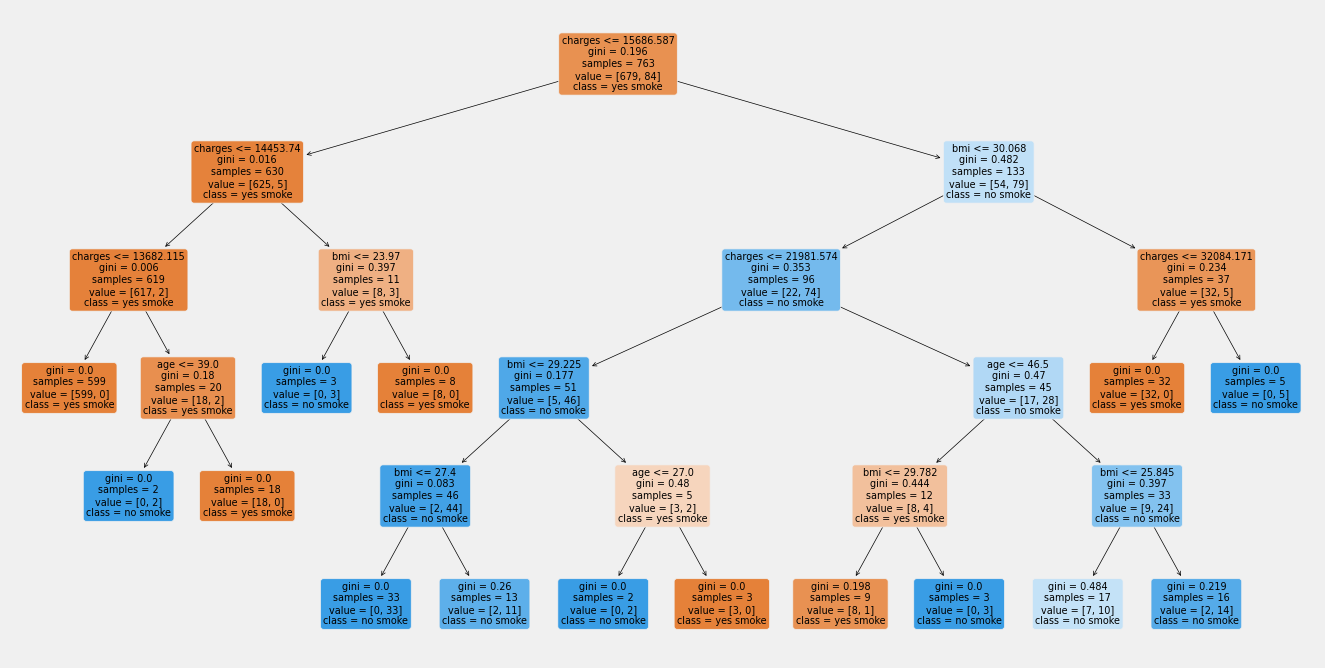

In [15]:
#feature labels
feature_label = ["age", 
              "bmi", 
              "children", 
              "charges", 
              "sex_female", 
              "sex_male", 
              "region_northeast", 
              "region_northwest", 
              "region_southeast", 
              "region_southwest"]


#plotting the tree
plt.figure(figsize=(15, 8))
tree.plot_tree(dtc, 
              filled = True,
              rounded = True,
              class_names = ["yes smoke", "no smoke"],
              feature_names = feature_label)

#save as image
plt.savefig("dt_smoker", dpi=300, bbox_inches = "tight")

plt.show()

              precision    recall  f1-score   support

          no       0.97      0.98      0.97       283
         yes       0.88      0.78      0.82        45

    accuracy                           0.95       328
   macro avg       0.92      0.88      0.90       328
weighted avg       0.95      0.95      0.95       328



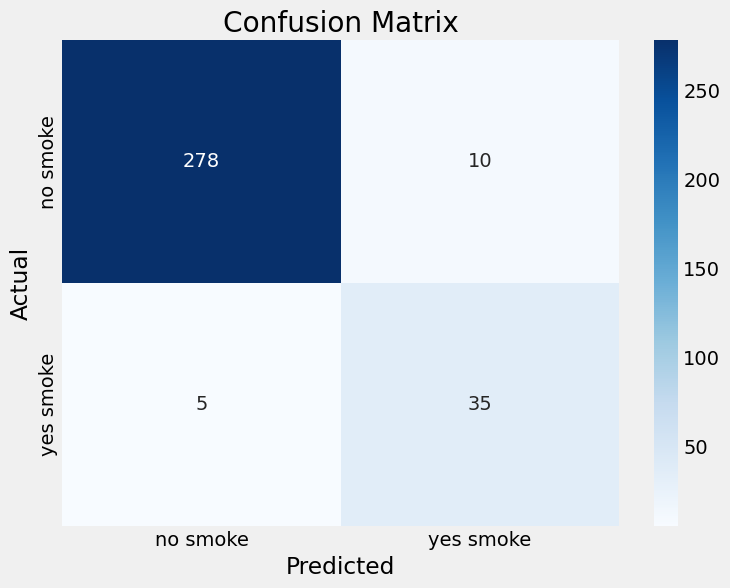

In [12]:
#imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#classification report
y_predict = dtc.predict(X_test)
print(classification_report(y_predict, y_test))

#confusion matrix
confusion = confusion_matrix(y_test, y_predict)

display_labels = ['no smoke', 'yes smoke']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=display_labels, yticklabels=display_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()